In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [22]:
import datetime as dt
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [26]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [28]:
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

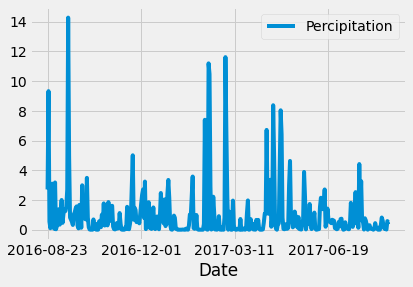

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()   
one_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_yr
# Perform a query to retrieve the data and precipitation scores
prcp_res = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23')
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_res, columns = ['Date', 'Percipitation'])
df.head(50)
# Sort the dataframe by date
by_date = df.sort_values(by="Date", ascending = True)
grouped = by_date.groupby(['Date']).sum()
grouped
# Use Pandas Plotting with Matplotlib to plot the data
grouped.plot()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
grouped.describe()

,Percipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [33]:


columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
# Design a query to show how many stations are available in this datase
session.query(Station.name).count()

9

In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 71.66378066378067, 85.0)]

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
high_temp = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= one_yr).all()

high_df = pd.DataFrame(high_temp)

pprint(high_temp)

[('USC00519281', 77.0, '2016-08-23'),
 ('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27'),
 ('USC00519281', 73.0, '2016-08-28'),
 ('USC00519281', 78.0, '2016-08-29'),
 ('USC00519281', 77.0, '2016-08-30'),
 ('USC00519281', 78.0, '2016-08-31'),
 ('USC00519281', 80.0, '2016-09-01'),
 ('USC00519281', 80.0, '2016-09-02'),
 ('USC00519281', 78.0, '2016-09-03'),
 ('USC00519281', 78.0, '2016-09-04'),
 ('USC00519281', 78.0, '2016-09-05'),
 ('USC00519281', 73.0, '2016-09-06'),
 ('USC00519281', 74.0, '2016-09-07'),
 ('USC00519281', 80.0, '2016-09-08'),
 ('USC00519281', 79.0, '2016-09-09'),
 ('USC00519281', 77.0, '2016-09-10'),
 ('USC00519281', 80.0, '2016-09-11'),
 ('USC00519281', 76.0, '2016-09-12'),
 ('USC00519281', 79.0, '2016-09-13'),
 ('USC00519281', 75.0, '2016-09-14'),
 ('USC00519281', 79.0, '2016-09-15'),
 ('USC00519281', 78.0, '2016-09-16'),
 ('USC00519281', 79.0, '2016-09-17'),
 ('USC005192

<function matplotlib.pyplot.show(*args, **kw)>

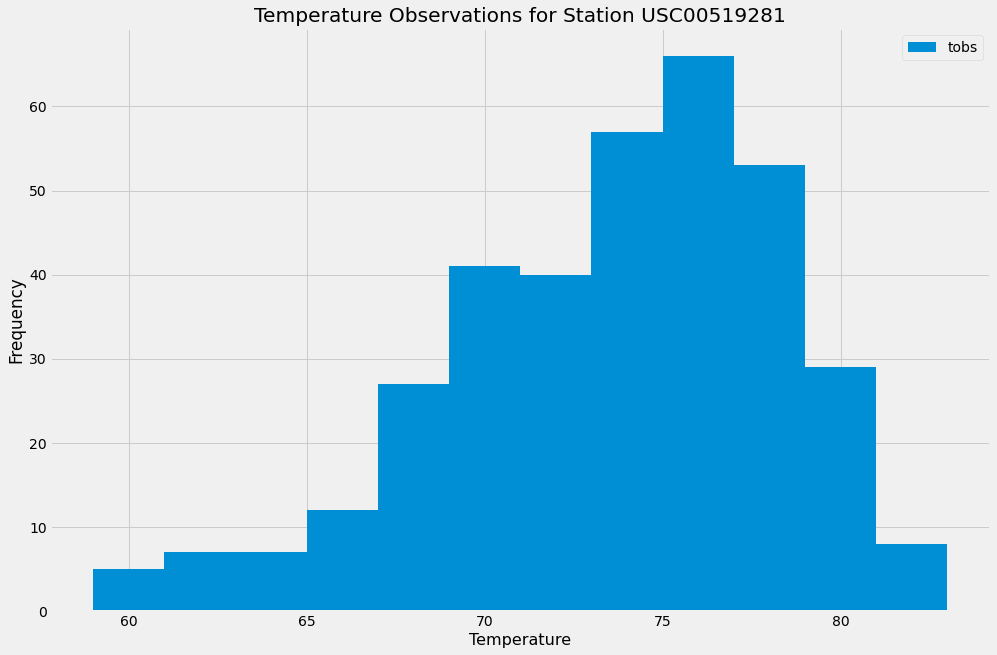

In [21]:
#Histogram
high_df.plot.hist(by='station', bins=12, figsize=(15,10))
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature", fontsize=16)
plt.legend()
plt.show

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
